<a href="https://colab.research.google.com/github/matheuscanel/CardioPredictor/blob/main/heartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Etapa 2: Upload do arquivo CSV (roda apenas uma vez no notebook)
from google.colab import files
uploaded = files.upload()  # Escolha o arquivo 'dados_investidores.csv' do seu computador

Saving heart.csv to heart.csv


In [4]:
df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Analise exploratoria inicial

In [5]:
# Verificar valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())



Valores nulos por coluna:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:

# Estatísticas básicas
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


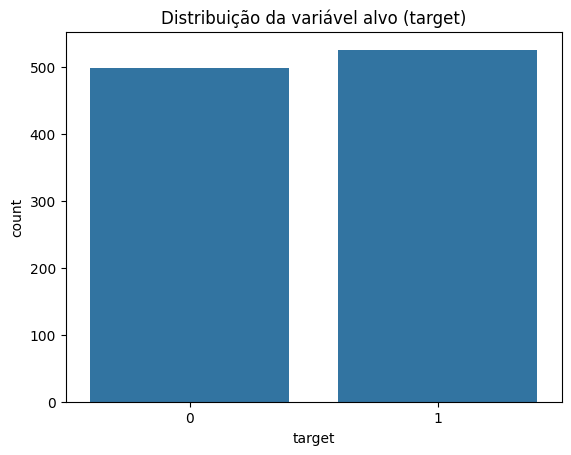

,count
target,
1,526
0,499


In [7]:

# Distribuição das classes
sns.countplot(x='target', data=df)
plt.title('Distribuição da variável alvo (target)')
plt.show()

df['target'].value_counts()


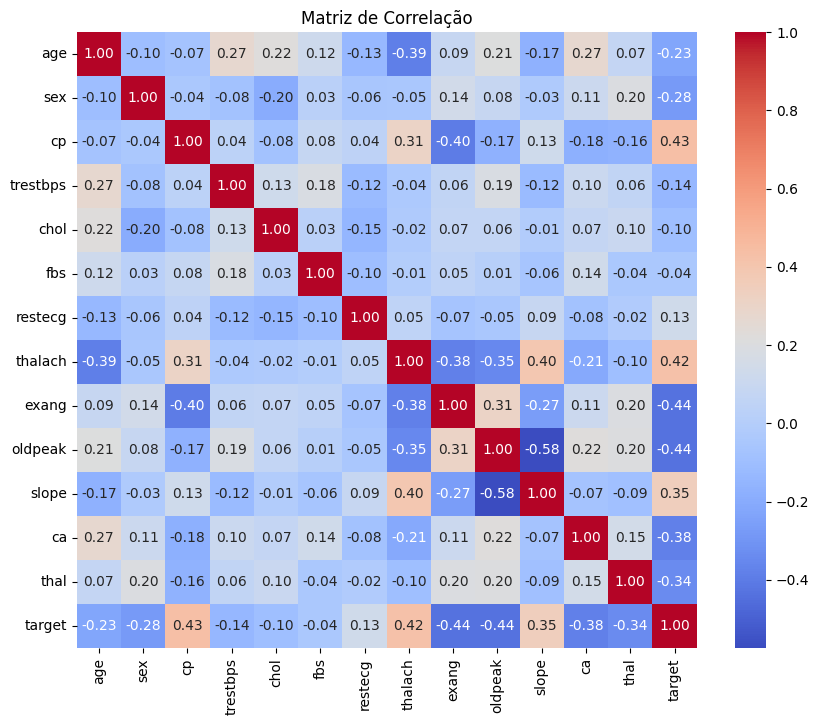

In [8]:

# Correlação entre variáveis numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

# Limpeza dos dados

Número de colunas numéricas: 13


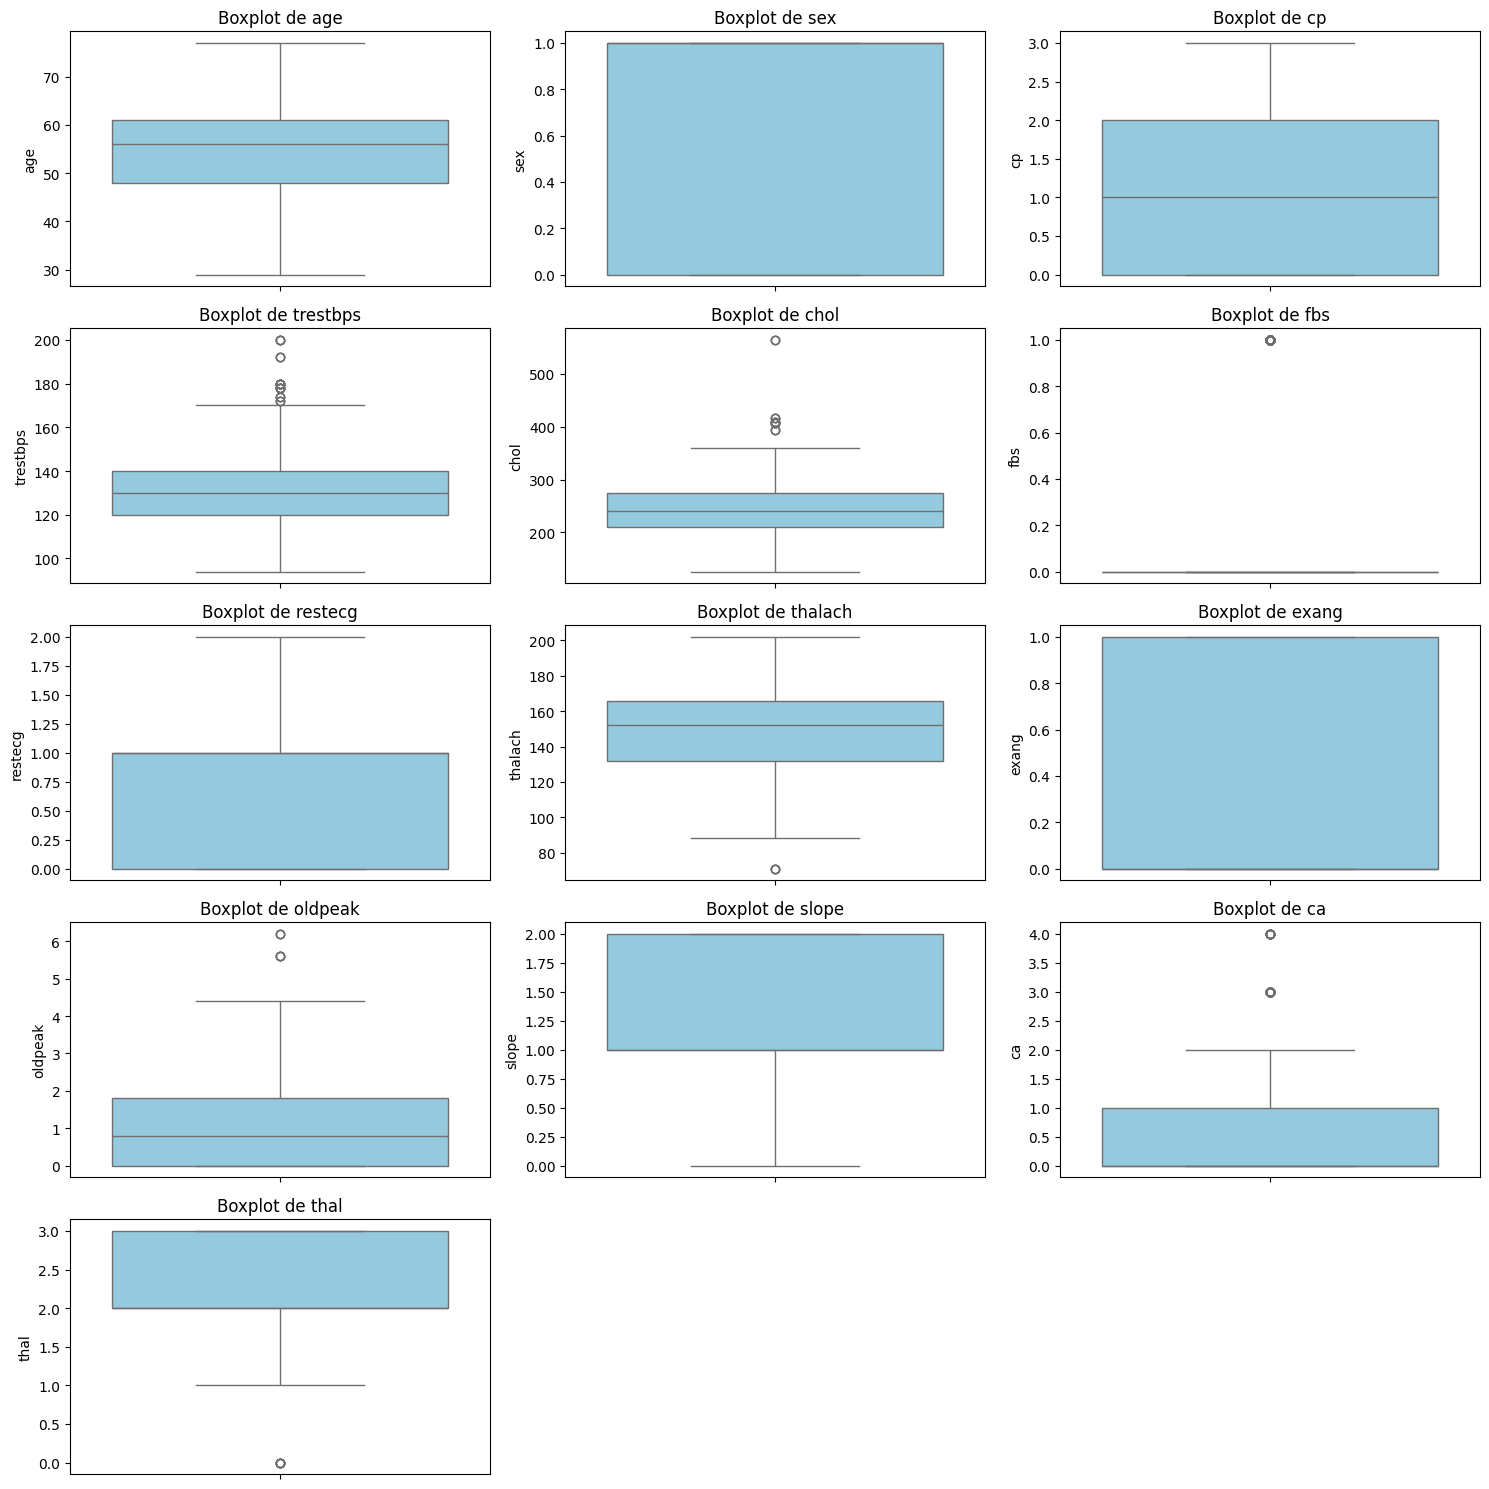

In [9]:
# Selecionar apenas colunas numéricas, excluindo 'target'
num_cols = df.select_dtypes(include='number').columns.drop('target')
print(f"Número de colunas numéricas: {len(num_cols)}")

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Gerar boxplots com espaço suficiente


n = len(num_cols)
rows = math.ceil(n / 3)
plt.figure(figsize=(15, rows * 3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()

plt.show()


In [10]:
def detectar_outliers(coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return len(outliers), limite_inferior, limite_superior

# Aplicar em todas as colunas numéricas
for col in num_cols:
    total_outliers, li, ls = detectar_outliers(col)
    print(f"{col}: {total_outliers} outliers | Limites: [{li:.2f}, {ls:.2f}]")


age: 0 outliers | Limites: [28.50, 80.50]
sex: 0 outliers | Limites: [-1.50, 2.50]
cp: 0 outliers | Limites: [-3.00, 5.00]
trestbps: 30 outliers | Limites: [90.00, 170.00]
chol: 16 outliers | Limites: [115.00, 371.00]
fbs: 153 outliers | Limites: [0.00, 0.00]
restecg: 0 outliers | Limites: [-1.50, 2.50]
thalach: 4 outliers | Limites: [81.00, 217.00]
exang: 0 outliers | Limites: [-1.50, 2.50]
oldpeak: 7 outliers | Limites: [-2.70, 4.50]
slope: 0 outliers | Limites: [-0.50, 3.50]
ca: 87 outliers | Limites: [-1.50, 2.50]
thal: 7 outliers | Limites: [0.50, 4.50]


In [11]:
# Substituir colesterol == 0 pela mediana (caso ainda não tenha feito)
chol_median = df[df['chol'] > 0]['chol'].median()
df['chol'] = df['chol'].replace(0, chol_median)

# Limpeza apenas dos outliers extremos
df_limpo = df[
    (df['trestbps'] >= 90) & (df['trestbps'] <= 170) &
    (df['chol'] >= 100) & (df['chol'] <= 450) &  # usando 450 como superior no artigo
    (df['thalach'] >= 80) & (df['thalach'] <= 197) &
    (df['oldpeak'] <= 4.5) &  # oldpeak negativo pode ocorrer clinicamente
    (df['ca'] >= 0) & (df['ca'] <= 4) &
    (df['thal'] >= 0) & (df['thal'] <= 3)
]

# Mostrar quantos registros foram removidos
print(f"Total original: {df.shape[0]}")
print(f"Total após limpeza: {df_limpo.shape[0]}")
print(f"Total removido: {df.shape[0] - df_limpo.shape[0]}")


Total original: 1025
Total após limpeza: 977
Total removido: 48


# Vizualição dos dados

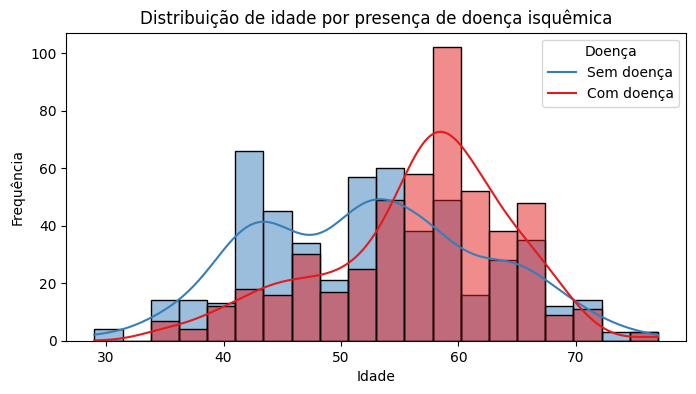

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='age', kde=True, hue='target', palette='Set1', bins=20)
plt.title('Distribuição de idade por presença de doença isquêmica')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend(title='Doença', labels=['Sem doença', 'Com doença'])
plt.show()


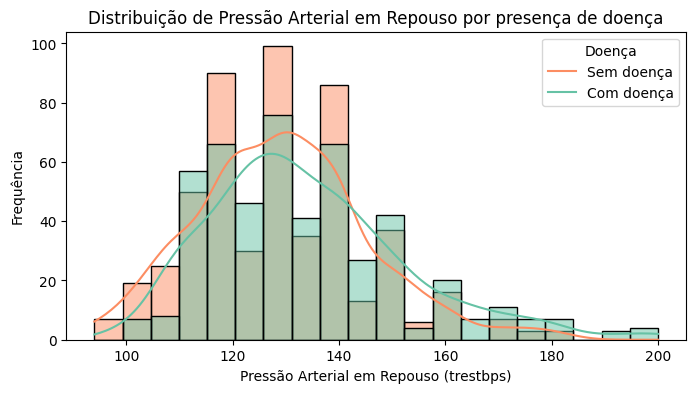

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='trestbps', kde=True, hue='target', palette='Set2', bins=20)
plt.title('Distribuição de Pressão Arterial em Repouso por presença de doença')
plt.xlabel('Pressão Arterial em Repouso (trestbps)')
plt.ylabel('Frequência')
plt.legend(title='Doença', labels=['Sem doença', 'Com doença'])
plt.show()


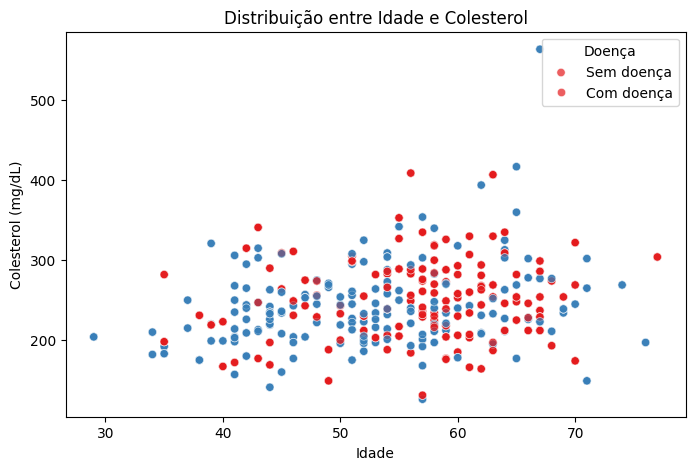

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='chol', hue='target', palette='Set1', alpha=0.7)
plt.title('Distribuição entre Idade e Colesterol')
plt.xlabel('Idade')
plt.ylabel('Colesterol (mg/dL)')
plt.legend(title='Doença', labels=['Sem doença', 'Com doença'])
plt.show()


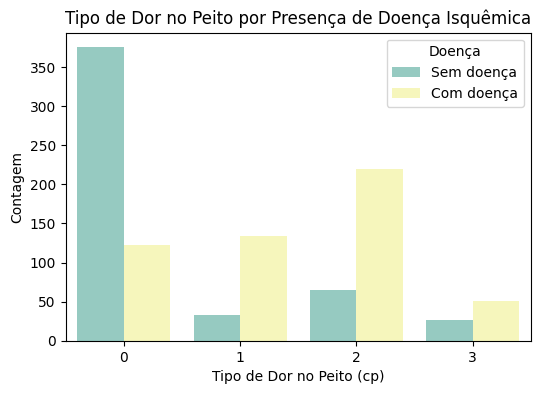

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='cp', data=df, hue='target', palette='Set3')
plt.title('Tipo de Dor no Peito por Presença de Doença Isquêmica')
plt.xlabel('Tipo de Dor no Peito (cp)')
plt.ylabel('Contagem')
plt.legend(title='Doença', labels=['Sem doença', 'Com doença'])
plt.show()


Codificação e escalonamento

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Separar features e alvo
X = df.drop('target', axis=1)
y = df['target']

In [17]:
# 2. Identificar colunas categóricas (com base no artigo)
categorical_cols = ['sex', 'cp', 'restecg', 'exang', 'slope']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [18]:
# 3. Codificação com LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

In [19]:

# 4. Escalonamento com StandardScaler
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [20]:
# 5. Verificar
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,1,0,-0.377636,-0.659332,-0.418878,1,0.821321,0,-0.060888,2,1.209221,1.089852
1,-0.158157,1,0,0.479107,-0.833861,2.387330,0,0.255968,1,1.727137,0,-0.731971,1.089852
2,1.716595,1,0,0.764688,-1.396233,-0.418878,1,-1.048692,1,1.301417,0,-0.731971,1.089852
3,0.724079,1,0,0.936037,-0.833861,-0.418878,1,0.516900,0,-0.912329,2,0.238625,1.089852
4,0.834359,0,0,0.364875,0.930822,2.387330,1,-1.874977,0,0.705408,1,2.179817,-0.522122


# Divisão de dados

In [21]:
from sklearn.model_selection import train_test_split

# Dividir os dados em 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Verificar tamanhos
print(f"Tamanho do treino: {X_train.shape}")
print(f"Tamanho do teste: {X_test.shape}")


Tamanho do treino: (717, 13)
Tamanho do teste: (308, 13)


In [22]:
# Juntar X_train e y_train para uma visão geral
import pandas as pd

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Resumo estatístico dos conjuntos
print("Resumo do conjunto de treino:")
display(train_df.describe())

print("Resumo do conjunto de teste:")
display(test_df.describe())


Resumo do conjunto de treino:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,0.015030,0.700139,0.937238,0.026878,0.055715,0.003815,0.516039,0.016447,0.333333,-0.000563,1.379358,-0.002332,0.026443,0.513250
std,1.007056,0.458517,1.023588,1.005381,1.006353,1.004441,0.524625,0.985205,0.471734,1.009417,0.626258,0.993248,0.958146,0.500173
min,-2.804866,0.000000,0.000000,-2.148237,-2.327054,-0.418878,0.000000,-3.397080,0.000000,-0.912329,0.000000,-0.731971,-3.746070,0.000000
25%,-0.709555,0.000000,0.000000,-0.663216,-0.659332,-0.418878,0.000000,-0.657294,0.000000,-0.912329,1.000000,-0.731971,-0.522122,0.000000
50%,0.172682,1.000000,1.000000,-0.092055,-0.077568,-0.418878,1.000000,0.125502,0.000000,-0.231177,1.000000,-0.731971,-0.522122,1.000000
75%,0.724079,1.000000,2.000000,0.479107,0.698116,-0.418878,1.000000,0.690855,1.000000,0.449976,2.000000,0.238625,1.089852,1.000000
max,2.488552,1.000000,3.000000,3.906079,6.166694,2.387330,2.000000,2.299935,1.000000,4.366603,2.000000,3.150413,1.089852,1.000000


Resumo do conjunto de teste:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-0.034988,0.685065,0.954545,-0.062569,-0.129701,-0.008880,0.561688,-0.038287,0.344156,0.001311,1.399351,0.005429,-0.061558,0.512987
std,0.985764,0.465246,1.045174,0.987792,0.976043,0.992795,0.534869,1.035816,0.475865,0.981011,0.598260,1.018754,1.091888,0.500645
min,-2.253469,0.000000,0.000000,-2.148237,-2.327054,-0.418878,0.000000,-3.397080,0.000000,-0.912329,0.000000,-0.731971,-3.746070,0.000000
25%,-0.819834,0.000000,0.000000,-0.663216,-0.814469,-0.418878,0.000000,-0.787760,0.000000,-0.912329,1.000000,-0.731971,-0.522122,0.000000
50%,0.062402,1.000000,0.500000,-0.092055,-0.232705,-0.418878,1.000000,0.125502,0.000000,-0.401465,1.000000,-0.731971,-0.522122,1.000000
75%,0.751649,1.000000,2.000000,0.479107,0.407235,-0.418878,1.000000,0.777832,1.000000,0.641550,2.000000,0.238625,1.089852,1.000000
max,2.378273,1.000000,3.000000,3.906079,6.166694,2.387330,2.000000,1.865048,1.000000,2.834010,2.000000,3.150413,1.089852,1.000000


Formato X_train: (717, 13)
Formato X_test : (308, 13)
Formato y_train: (717,)
Formato y_test : (308,)

Valores nulos em X_train:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

Valores nulos em X_test:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

Distribuição das classes em y_train:
target
1    0.51325
0    0.48675
Name: proportion, dtype: float64

Distribuição das classes em y_test:
target
1    0.512987
0    0.487013
Name: proportion, dtype: float64


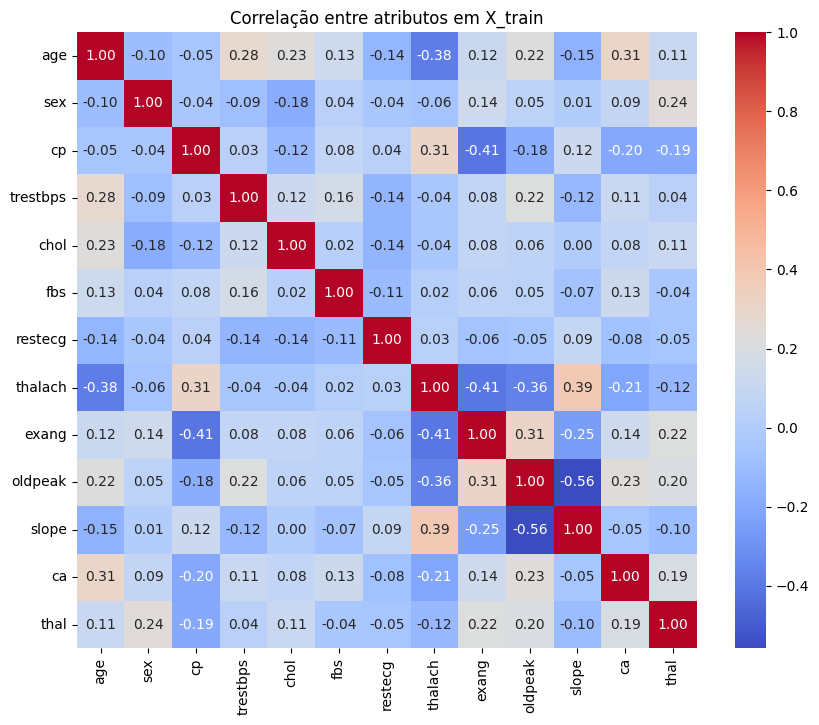

In [23]:
# Verificar formatos dos conjuntos
print("Formato X_train:", X_train.shape)
print("Formato X_test :", X_test.shape)
print("Formato y_train:", y_train.shape)
print("Formato y_test :", y_test.shape)

# Verificar se há valores nulos
print("\nValores nulos em X_train:")
print(X_train.isnull().sum())

print("\nValores nulos em X_test:")
print(X_test.isnull().sum())

# Verificar a distribuição das classes
print("\nDistribuição das classes em y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribuição das classes em y_test:")
print(y_test.value_counts(normalize=True))

# Visualização rápida da matriz de correlação
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlação entre atributos em X_train")
plt.show()


# Modelagem e Avaliação dos Modelos Preditivos

=== Regressão Logística ===
Acurácia:     0.8247
Precisão:     0.7889
Recall:       0.8987
F1 Score:     0.8402
Especificidade: 0.7467
AUC:          0.9250


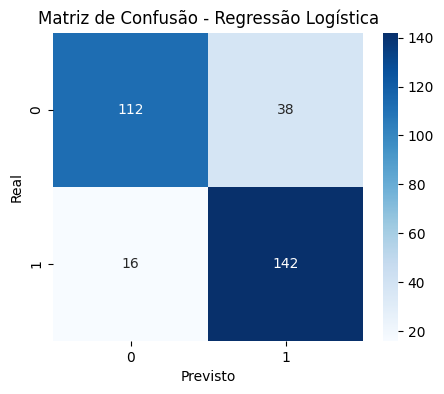

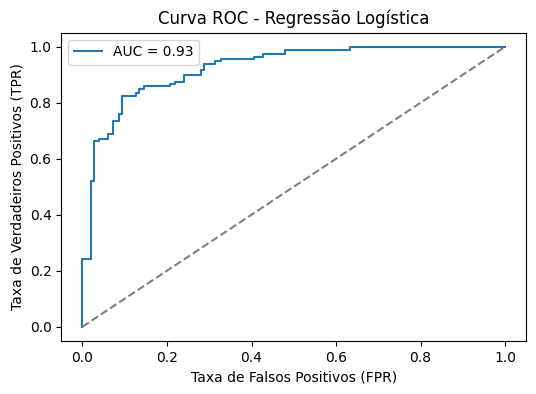

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Treinar o modelo
lr_model = LogisticRegression(solver='saga', penalty='l2', C=1.0, max_iter=1000)
lr_model.fit(X_train, y_train)

# 2. Fazer previsões
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]

# 3. Calcular métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Especificidade: TN / (TN + FP)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
spec = tn / (tn + fp)

resultados_modelos = {}
# 7. Armazenar no dicionário de resultados
resultados_modelos["Regressão Logística"] = {
    "Acurácia": acc,
    "Precisão": prec,
    "Recall": rec,
    "F1-Score": f1,
    "Especificidade": spec,
    "AUC": auc
}


# 4. Exibir as métricas
print("=== Regressão Logística ===")
print(f"Acurácia:     {acc:.4f}")
print(f"Precisão:     {prec:.4f}")
print(f"Recall:       {rec:.4f}")
print(f"F1 Score:     {f1:.4f}")
print(f"Especificidade: {spec:.4f}")
print(f"AUC:          {auc:.4f}")

# 5. Matriz de confusão
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# 6. Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Regressão Logística")
plt.legend()
plt.show()


=== Árvore de Decisão ===
Acurácia: 0.8831
Precisão: 0.9357
Recall: 0.8291
F1-Score: 0.8792
Especificidade: 0.9400
AUC: 0.9611


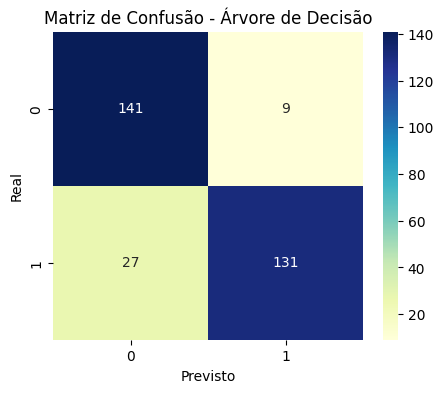

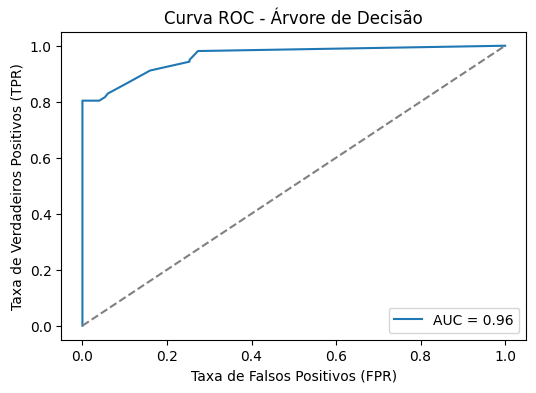

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Criar o modelo
dt_model = DecisionTreeClassifier(
    criterion='log_loss',
    max_depth=None,           # Deixe como None para crescer totalmente
    min_samples_leaf=5,       # Evita overfitting
    min_samples_split=10,     # Mínimo para dividir um nó
    random_state=42
)

# Treinar
dt_model.fit(X_train, y_train)

# Prever
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Métricas
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()
spec_dt = tn / (tn + fp)

# Armazenar os resultados para comparar depois

resultados_modelos["Decision Tree"] = {
    "Acurácia": acc_dt,
    "Precisão": prec_dt,
    "Recall": rec_dt,
    "F1-Score": f1_dt,
    "Especificidade": spec_dt,
    "AUC": auc_dt
}

# Exibir métricas
print("=== Árvore de Decisão ===")
for k, v in resultados_modelos["Decision Tree"].items():
    print(f"{k}: {v:.4f}")

# Matriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.savefig("confusion_matrix_dt.png")
plt.show()

# Curva ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f"AUC = {auc_dt:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Árvore de Decisão")
plt.legend()
plt.savefig("roc_curve_dt.png")
plt.show()


=== Random Forest ===
Acurácia: 0.9481
Precisão: 0.9671
Recall: 0.9304
F1-Score: 0.9484
Especificidade: 0.9667
AUC: 0.9828


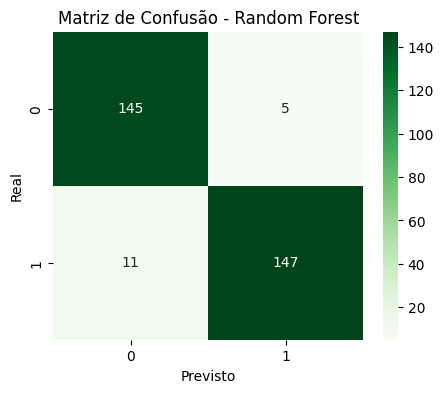

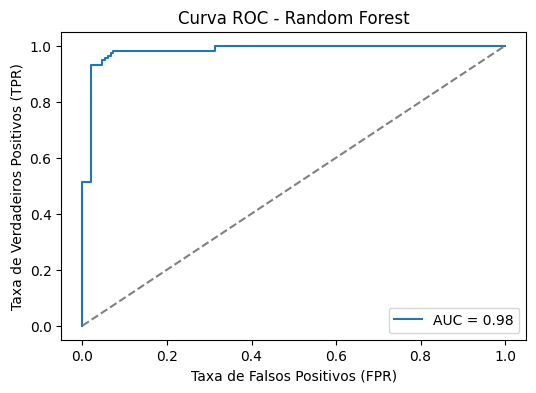

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Criar o modelo
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

# Treinar
rf_model.fit(X_train, y_train)

# Prever
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calcular métricas
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()
spec_rf = tn / (tn + fp)

# Armazenar resultados
resultados_modelos["Random Forest"] = {
    "Acurácia": acc_rf,
    "Precisão": prec_rf,
    "Recall": rec_rf,
    "F1-Score": f1_rf,
    "Especificidade": spec_rf,
    "AUC": auc_rf
}

# Exibir métricas
print("=== Random Forest ===")
for k, v in resultados_modelos["Random Forest"].items():
    print(f"{k}: {v:.4f}")

# Matriz de Confusão
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.savefig("confusion_matrix_rf.png")
plt.show()

# Curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {auc_rf:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.savefig("roc_curve_rf.png")
plt.show()


=== SVM (RBF Kernel) ===
Acurácia: 0.8799
Precisão: 0.8758
Recall: 0.8924
F1-Score: 0.8840
Especificidade: 0.8667
AUC: 0.9635


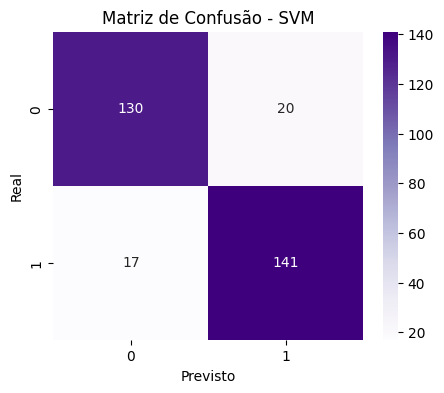

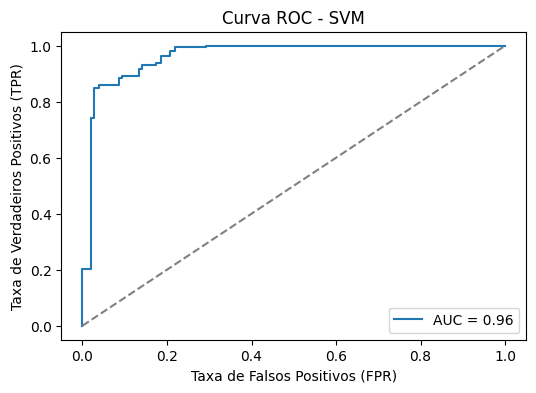

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

# Criar o modelo SVM com kernel RBF
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    probability=True,   # necessário para curva ROC
    random_state=42
)

# Treinar
svm_model.fit(X_train, y_train)

# Prever
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Métricas
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_proba_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()
spec_svm = tn / (tn + fp)

# Armazenar resultados
resultados_modelos["SVM"] = {
    "Acurácia": acc_svm,
    "Precisão": prec_svm,
    "Recall": rec_svm,
    "F1-Score": f1_svm,
    "Especificidade": spec_svm,
    "AUC": auc_svm
}

# Exibir métricas
print("=== SVM (RBF Kernel) ===")
for k, v in resultados_modelos["SVM"].items():
    print(f"{k}: {v:.4f}")

# Matriz de Confusão
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples')
plt.title("Matriz de Confusão - SVM")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.savefig("confusion_matrix_svm.png")
plt.show()

# Curva ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, label=f"AUC = {auc_svm:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - SVM")
plt.legend()
plt.savefig("roc_curve_svm.png")
plt.show()


=== Naive Bayes Gaussiano ===
Acurácia: 0.8344
Precisão: 0.8365
Recall: 0.8418
F1-Score: 0.8391
Especificidade: 0.8267
AUC: 0.9142


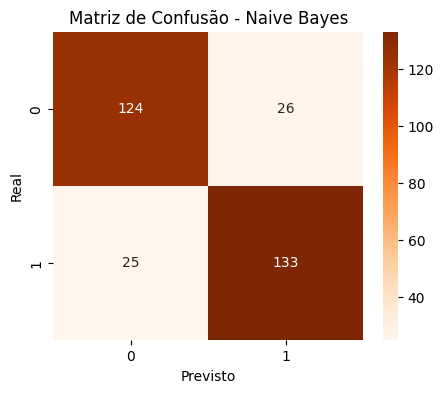

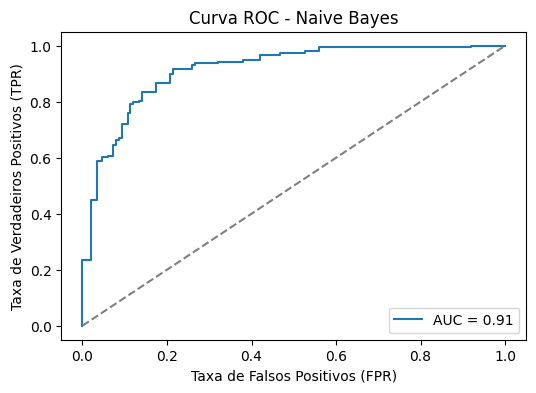

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

# Criar modelo
gnb_model = GaussianNB(var_smoothing=1e-9)

# Treinar
gnb_model.fit(X_train, y_train)

# Prever
y_pred_gnb = gnb_model.predict(X_test)
y_proba_gnb = gnb_model.predict_proba(X_test)[:, 1]

# Métricas
acc_gnb = accuracy_score(y_test, y_pred_gnb)
prec_gnb = precision_score(y_test, y_pred_gnb)
rec_gnb = recall_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
auc_gnb = roc_auc_score(y_test, y_proba_gnb)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
tn, fp, fn, tp = cm_gnb.ravel()
spec_gnb = tn / (tn + fp)

# Armazenar
resultados_modelos["Naive Bayes"] = {
    "Acurácia": acc_gnb,
    "Precisão": prec_gnb,
    "Recall": rec_gnb,
    "F1-Score": f1_gnb,
    "Especificidade": spec_gnb,
    "AUC": auc_gnb
}

# Exibir
print("=== Naive Bayes Gaussiano ===")
for k, v in resultados_modelos["Naive Bayes"].items():
    print(f"{k}: {v:.4f}")

# Matriz de Confusão
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Oranges')
plt.title("Matriz de Confusão - Naive Bayes")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.savefig("confusion_matrix_gnb.png")
plt.show()

# Curva ROC
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_proba_gnb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_gnb, tpr_gnb, label=f"AUC = {auc_gnb:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Naive Bayes")
plt.legend()
plt.savefig("roc_curve_gnb.png")
plt.show()


Melhor valor de K: 1 (Acurácia = 0.9708)

=== KNN ===
K ótimo: 1
Acurácia: 0.9708
Precisão: 0.9806
Recall: 0.9620
F1-Score: 0.9712
Especificidade: 0.9800
AUC: 0.9710


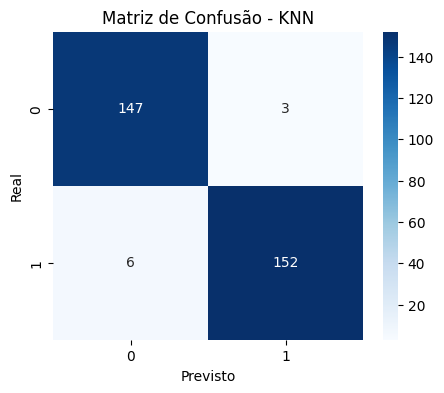

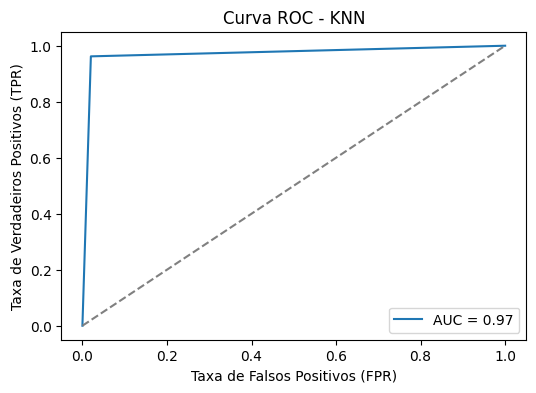

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Encontrar melhor valor de K
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(acc)

melhor_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor valor de K: {melhor_k} (Acurácia = {max(accuracy_scores):.4f})")

# 2. Treinar modelo final com melhor K
knn_model = KNeighborsClassifier(
    n_neighbors=melhor_k,
    weights='distance',
    metric='minkowski'
)
knn_model.fit(X_train, y_train)

# 3. Previsão
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# 4. Cálculo das métricas
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()
spec_knn = tn / (tn + fp)

# 5. Armazenar
resultados_modelos["KNN"] = {
    "K ótimo": melhor_k,
    "Acurácia": acc_knn,
    "Precisão": prec_knn,
    "Recall": rec_knn,
    "F1-Score": f1_knn,
    "Especificidade": spec_knn,
    "AUC": auc_knn
}

# 6. Mostrar métricas
print("\n=== KNN ===")
for k, v in resultados_modelos["KNN"].items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

# 7. Matriz de confusão
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - KNN")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.savefig("confusion_matrix_knn.png")
plt.show()

# 8. Curva ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f"AUC = {auc_knn:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - KNN")
plt.legend()
plt.savefig("roc_curve_knn.png")
plt.show()


,Acurácia,Precisão,Recall,F1-Score,Especificidade,AUC,K ótimo
KNN,0.9708,0.9806,0.9620,0.9712,0.9800,0.9710,1.0
Random Forest,0.9481,0.9671,0.9304,0.9484,0.9667,0.9828,NaN
Decision Tree,0.8831,0.9357,0.8291,0.8792,0.9400,0.9611,NaN
SVM,0.8799,0.8758,0.8924,0.8840,0.8667,0.9635,NaN
Naive Bayes,0.8344,0.8365,0.8418,0.8391,0.8267,0.9142,NaN
Regressão Logística,0.8247,0.7889,0.8987,0.8402,0.7467,0.9250,NaN


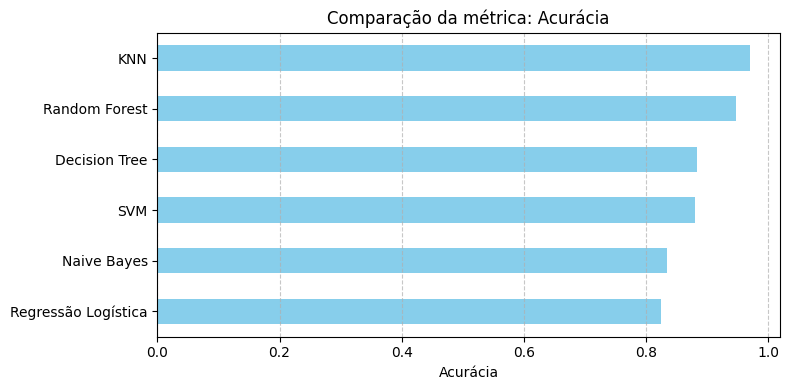

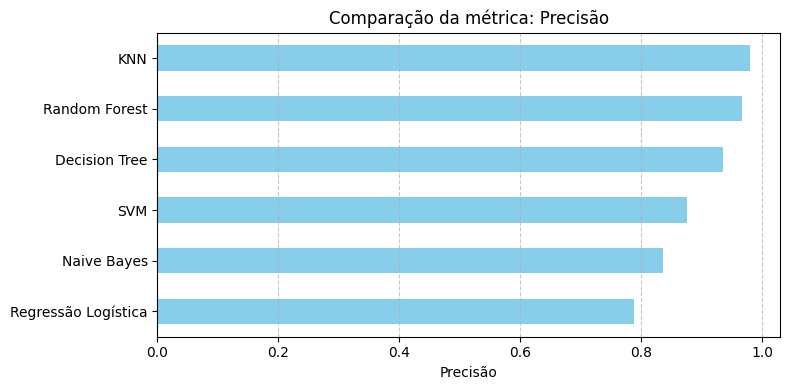

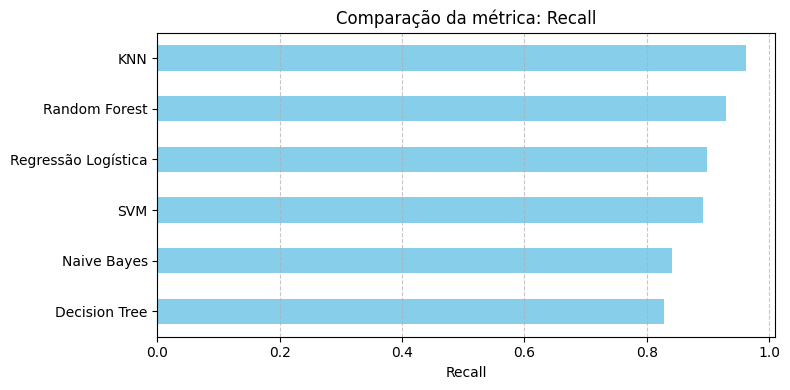

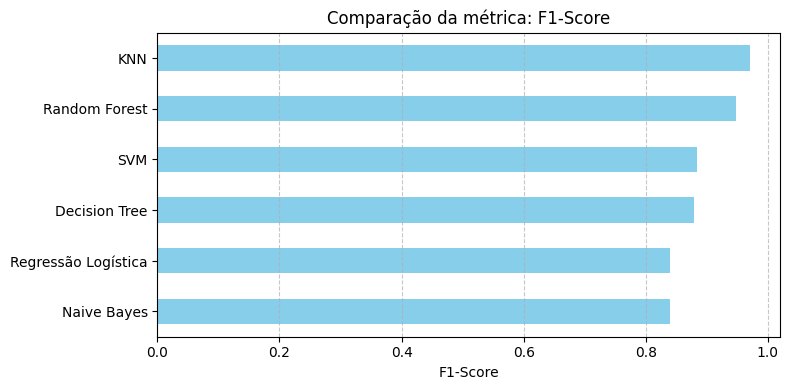

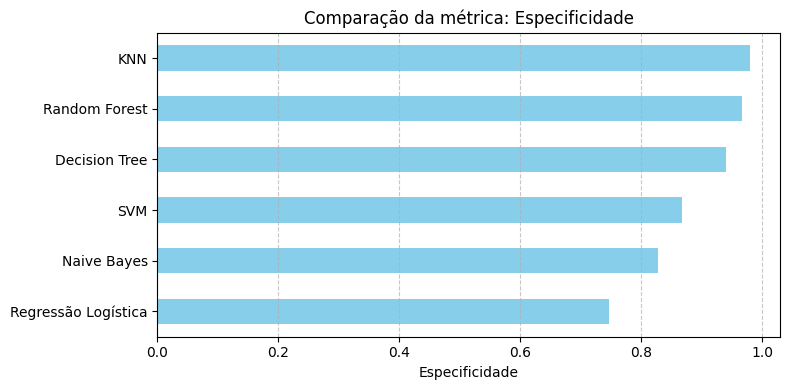

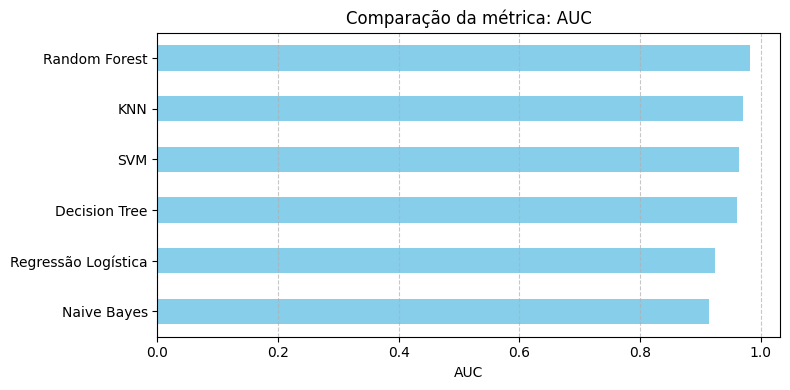

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter o dicionário em DataFrame
df_resultados = pd.DataFrame(resultados_modelos).T

# Exibir tabela ordenada pela Acurácia
display(df_resultados.sort_values(by="Acurácia", ascending=False).round(4))

# Plotar gráfico de barras para cada métrica
metricas = ['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'Especificidade', 'AUC']
for metrica in metricas:
    plt.figure(figsize=(8, 4))
    df_resultados[metrica].sort_values().plot(kind='barh', color='skyblue')
    plt.title(f'Comparação da métrica: {metrica}')
    plt.xlabel(metrica)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

